# 第 9 章第 2 节-实例：文档分类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

# os.makedirs('./datasets/mlcomp/379/train')

In [3]:
%%time
from sklearn.datasets import load_files

news_train = load_files('./datasets/mlcomp/379/train')
# news_train

CPU times: user 964 ms, sys: 934 ms, total: 1.9 s
Wall time: 2.95 s


In [4]:
len(news_train.data)

13180

In [5]:
len(news_train.target_names)

20

13180 篇文章里有 20 类新闻数据。

## 特征工程

把这些文档全部转换成由 TF-IDF 表达的权重信息构成的向量。

+ IDF：逆向文档频率指数。

In [6]:
type(news_train)

sklearn.utils.Bunch

In [7]:
dir(news_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [8]:
print(news_train.data[0])

b'From: demon@desire.wright.edu (Not a Boomer)\nSubject: The real source of trouble in the US health care system\n\n\tCancel private health insurance?\n\n\tWhen government care that only covers 20% of the population consumes\n42% of the spending for health care?\n\n\tNOT!\n\n\tNational Health Expenditures: 1960 to 1990\n(Includes Puerto Rico and outlying areas.)\n\nYear\tHealth Services and Supplies ($billions)\n\tPrivate\t\tPublic\n====================================\n1960\t$19.8\t\t$5.7\t(22% of total)\n1970\t$44.1\t\t$24.9\t(56% of total)\n1980\t$140.7\t\t$98.1\t(41% of total)\n1990\t$374.8\t\t$268.6\t(42% of total)\n\n[Source: American Almanac, Page 97.  1992-3 Edition]\n\n\tNow you understand where most of that 12.2% of GNP is going--to waste.\n\n\tBy these figures, private insurance is spending 58% of the money to\ncover 4 times as many people.\n\n\tGo figure.\n\nBrett\n________________________________________________________________________________\n\t"There\'s nothing so passi

In [9]:
np.unique(news_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='latin-1')
# 转换成元组又是为什么
# X_train = vectorizer.fit_transform((d for d in news_train.data))
X_train = vectorizer.fit_transform(news_train.data)

In [11]:
X_train.shape

(13180, 130274)

In [12]:
# 查看非零元素的个数
print("number of non-zero features in sample [{0}]: {1}".format(
    news_train.filenames[0], X_train[0].getnnz()))

number of non-zero features in sample [./datasets/mlcomp/379/train/talk.politics.misc/17860-178992]: 108


类似于独热编码，缺点是每一篇文章的维度很高，非零元的个数很少，是一个稀疏向量。

## 使用多项式贝叶斯进行模型训练

+ alpha 表示平滑参数，其值越小，越容易过拟合；值太大，容易欠拟合。

In [13]:
y_train = news_train.target

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.0001)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
train_score

0.9978755690440061

训练数据集上的准确率很高，有过拟合风险。

下面看看在测试数据集上的表现。

In [15]:
news_test = load_files('./datasets/mlcomp/379/test')

In [16]:
len(news_test.data), len(news_test.target_names)

(5648, 20)

对于测试数据集，使用同样的方式向量化。

In [17]:
# X_test = vectorizer.transform((d for d in news_test.data))
X_test = vectorizer.transform(news_test.data)
y_test = news_test.target

In [18]:
# 维度和训练数据集一样
X_test.shape

(5648, 130274)

也是稀疏向量。

In [19]:
print("number of non-zero features in sample [{0}]: {1}".format(
    news_test.filenames[0], X_test[0].getnnz()))

number of non-zero features in sample [./datasets/mlcomp/379/test/rec.autos/7429-103268]: 61


In [20]:
X_test[0].toarray()

array([[0.        , 0.18422719, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
pred = clf.predict(X_test[0])
pred

array([7])

In [22]:
y_test[0]

7

In [23]:
news_test.filenames[0]

'./datasets/mlcomp/379/test/rec.autos/7429-103268'

In [24]:
news_test.target_names[7]

'rec.autos'

In [25]:
score = clf.score(X_test, y_test)
score

0.9088172804532578

泛化性能还不错。

In [26]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
# 真实值，预测值
accuracy_score(y_test, y_pred)

0.9088172804532578

In [29]:
clf

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [30]:
from sklearn.metrics import classification_report

print(
    classification_report(y_test, y_pred, target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics       0.91      0.85      0.88       313
                 sci.med       0.96      0.96      0.96       277
         

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 284   2   1   0   0

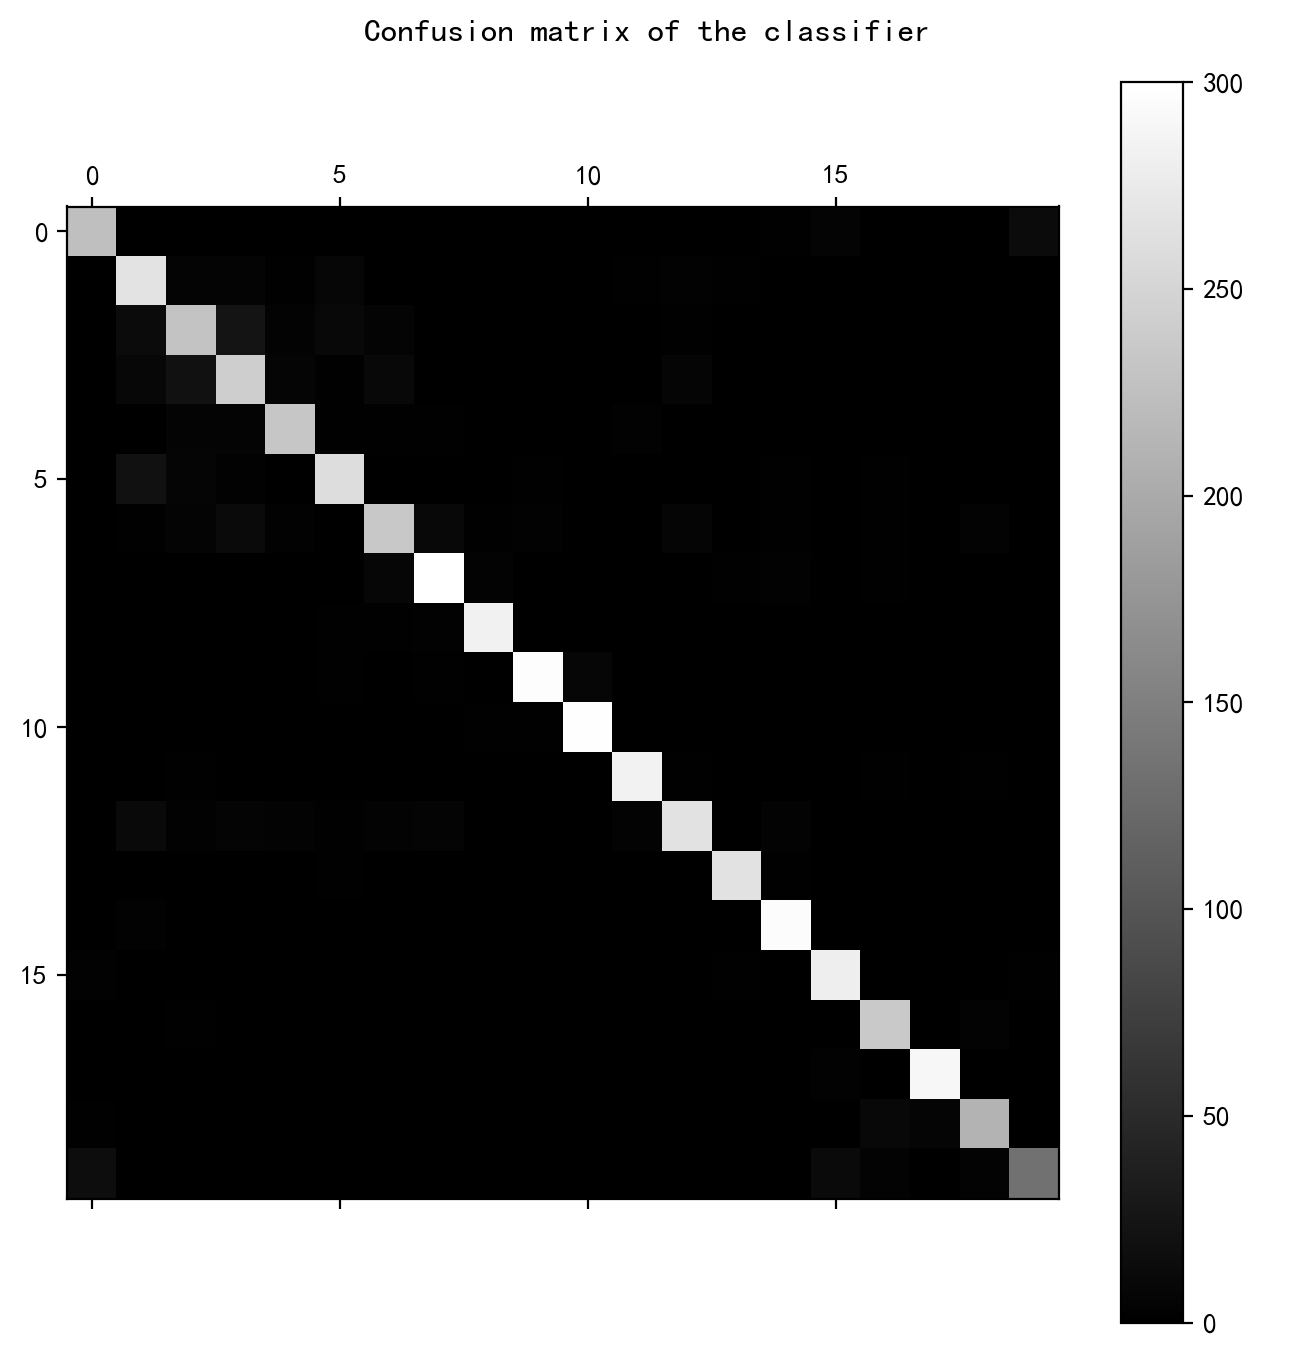

In [32]:
# Show confusion matrix
plt.figure(figsize=(8, 8), dpi=100)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray')
plt.colorbar()
plt.show()

## 鸢尾花数据集使用高斯贝叶斯

特征是连续类型的时候，使用高斯贝叶斯，假设特征呈正态分布。

In [33]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=666)

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.98